<a href="https://colab.research.google.com/github/ThaniNikolaou/DataJour/blob/main/HomeWork_Week7_NikolaouTheodora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ΚΩΔΙΚΑΣ**

In [74]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import seaborn as sns
import time

In [ ]:
!python -m spacy download el_core_news_sm

In [75]:
start_page = 6            #08/06
end_page = 10             #08/06

start_url = 'https://www.tovima.gr/latest-news/page/'

test_url = start_url+str(start_page)

In [76]:
response = requests.get(test_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [77]:
teaser_articles_list = doc.find('div', {'class': 'columns is-variable is-multiline is-4-desktop is-0-mobile'}).find_all('div', {'class':'simple-row'})

In [78]:
teaser_articles_list[0]

<div class="simple-row"> <a class="columns is-mobile is-multiline" href="https://www.tovima.gr/2023/06/09/society/panellinies-2023-epal-se-tessera-mathimata-grafoun-simera-oi-ypopsifioi/"><div class="column is-2-desktop is-2-tablet is-2-mobile is-full-small"> <time class="line-height-1 mr-3 post-date updated manrope is-size-5 semigrey-c"> 09.06.2023, 07:33 </time></div><div class="column is-6-desktop is-6-tablet is-6-mobile is-full-small"><div class="wrap-row-header-n-desk"><h3 class="o-head f-400 my-0 is-size-2 zonabold"> Πανελλήνιες 2023 – ΕΠΑΛ: Σε τέσσερα μαθήματα εξετάζονται σήμερα οι υποψήφιοι</h3><p class="is-size-normal mb-0 mt-4 text-ellipsis text-ellipsis-4 grey-c line-height-1-3"> Συνεχίζονται οι Πανελλήνιες Εξετάσεις για τους υποψηφίους των ΕΠΑΛ, την Παρασκευή (9/6), με τέσσερα μαθήματα ειδικότητας</p><div class="pt-4 category-row-footer"></div></div></div><div class="column is-4-desktop is-4-tablet is-4-mobile is-full-small"><div class="wrap-thumb"><figure class="tile-image

In [ ]:
print(teaser_articles_list[0].prettify())

In [ ]:
link = teaser_articles_list[0].find('a', {'class':'columns is-mobile is-multiline'})['href']
print(link)

In [ ]:
main_url = 'https://www.tovima.gr/'
article_link = main_url + link
print(article_link) 

In [82]:
teasers_list = []

for page_num in range(start_page, end_page+1):
  page_url = start_url + str(page_num)
  response = requests.get(page_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  
  teaser_articles_list = doc.find('div', {'class': 'columns is-variable is-multiline is-4-desktop is-0-mobile'}).find_all('div', {'class':'simple-row'})


  for teaser in teaser_articles_list:
      story_dict = {}
      try:
        
        
        link = teaser.find('a', {'class':'columns is-mobile is-multiline'})['href'] 
        

        if link.startswith("http"):
          story_dict['url'] = link
        else:
          story_dict['url'] = main_url + link
      except:
        story_dict['url'] = ''
        pass
      teasers_list.append(story_dict)
  time.sleep(1)

In [ ]:
tovima_teaser_df = pd.DataFrame(teasers_list)
tovima_teaser_df.head

In [84]:
tovima_teaser_df.drop_duplicates(inplace=True)

In [ ]:
tovima_teaser_df

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
tovima_teaser_df.to_csv('/content/drive/MyDrive/DATA_JOUR/tovima_teaser_df.csv')

In [88]:
article_url = 'https://www.tovima.gr/2023/06/07/world/fragma-kaxovka-sta-5-metra-i-stathmi-tou-nerou-sxedon-5-900-anthropoi-exoun-apomakrynthei/'

In [89]:
response = requests.get(article_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [ ]:
article = doc.find('article', {'class': 'columns is-relative is-variable is-4-desktop is-multiline'})
print(article.prettify())

In [91]:
section = doc.find('a', {'class': 'parent-category'}).text
section

'Κόσμος '

In [92]:
title = article.find('h1').text
title

' Φράγμα Καχόβκα: Στα 5 μέτρα η στάθμη του νερού – Σχεδόν 5.900 άνθρωποι έχουν απομακρυνθεί'

In [93]:
date = doc.find('div', {'class': 'post-meta-r2'}).text
date

' 07.06.2023 22:23'

In [94]:
author = article.find('span', {'class', "vima-author"}).text
author


' Newsroom '

In [ ]:
paragraphs = doc.find_all('p')
paragraphs

In [ ]:
p_texts_list = []                      
paragraphs = doc.find_all('p')     
for p in paragraphs:                   
  p_texts_list.append(p.text)          
full_text = ' '.join(p_texts_list)     
full_text = "".join(full_text.splitlines())
full_text

In [ ]:
tovima_teaser_df = pd.read_csv('/content/drive/MyDrive/DATA_JOUR/tovima_teaser_df.csv')
tovima_teaser_df.head(10)

In [125]:
full_articles_list = []

for article_url in tovima_teaser_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')


  article = doc.find('article', {'class': 'columns is-relative is-variable is-4-desktop is-multiline'})

  full_article_dict = {}
  
  # website
  full_article_dict['site'] = "https://www.tovima.gr/"
  
  # url
  full_article_dict['url'] = article_url

  #section
  try:
    section = doc.find('a', {'class': 'parent-category'}).text
    full_article_dict['section'] = section
  except:
    full_article_dict['section'] = ''
    pass

  #title
  try:
    title = article.find('h1').text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = '' 
    pass

  # date
  try:
    date = doc.find('div', {'class': 'post-meta-r2'}).text
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # author
  try:
    author = article.find('span', {'class', "vima-author"}).text
    full_article_dict['author'] = author
  except:
    full_article_dict['author'] = ''
    pass

  # full_text
  try:
    p_texts_list = []                      
    paragraphs = doc.find_all('p')    
    for p in paragraphs:                  
      p_texts_list.append(p.text)      
    full_text = ' '.join(p_texts_list)  
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text  
  except:
    full_article_dict['full_text'] = '' 
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [225]:
tovima_full_articles_df = pd.DataFrame(full_articles_list)
tovima_full_articles_df

,site,url,section,title,date,author,full_text
0,https://www.tovima.gr/,https://www.tovima.gr/2023/06/09/society/panel...,Κοινωνία,Πανελλήνιες 2023 – ΕΠΑΛ: Σε τέσσερα μαθήματα ...,09.06.2023 07:33,Newsroom,Για τέταρτη ημέρα συνεχίζονται σήμερα οι Πανελ...
1,https://www.tovima.gr/,https://www.tovima.gr/2023/06/09/society/koino...,Κοινωνία,Κοινωνικός Τουρισμός: Ανοίγει ξανά σήμερα 9 Ι...,09.06.2023 07:29,Newsroom,Ανοίγει ξανά σήμερα Παρασκευή 9 Ιουνίου στις 1...
2,https://www.tovima.gr/,https://www.tovima.gr/2023/06/09/world/kouva-p...,Κόσμος,Κούβα: Ψευδή τα δημοσιεύματα των ΗΠΑ περί βάσ...,09.06.2023 07:22,Newsroom,Η διπλωματία της Κούβας χαρακτήρισε χθες Πέμπτ...
3,https://www.tovima.gr/,https://www.tovima.gr/2023/06/09/stiles/vimato...,Βηματοδότης,Στα σκαριά συνάντηση υπουργών Άμυνας Ελλάδας ...,09.06.2023 07:16,ΒΗΜΑτοδότης,"«Ψήνεται», μαθαίνω, συνάντηση στο ΝΑΤΟ ανάμεσα..."
4,https://www.tovima.gr/,https://www.tovima.gr/2023/06/09/society/enas-...,Κοινωνία,,09.06.2023 06:49,,Φωτιά ξέσπασε τα ξημερώματα σε διαμέρισμα που ...
...,...,...,...,...,...,...,...
95,https://www.tovima.gr/,https://www.tovima.gr/2023/06/08/science/rompo...,Science,Ρομπότ- «σεφ» φτιάχνει τις καλύτερες σαλάτες,08.06.2023 06:50,Ν. Θεοδώρα Τσώλη,Ερευνητές του Πανεπιστημίου του Κέιμπριτζ εκπα...
96,https://www.tovima.gr/,https://www.tovima.gr/print/finance/mikro-kala...,Οικονομία,«Μικρό καλάθι» για τη μείωση των εισφορών,08.06.2023 06:40,Κώστας Παπαδής,Μόλις μία μονάδα περαιτέρω μείωση των ασφαλιστ...
97,https://www.tovima.gr/,https://www.tovima.gr/2023/06/08/5-to-proi/i-a...,5 το πρωί,Η ατζέντα της ημέρας: Το δίλημμα για τρίτες κ...,08.06.2023 05:00,Βασίλης Σφήνας,Ποια είναι τα νέα κόμματα που ζητούν την ψήφο...
98,https://www.tovima.gr/,https://www.tovima.gr/2023/06/08/society/dipli...,Κοινωνία,Διπλή εκτέλεση στον Κορυδαλλό: Το παρελθόν τω...,08.06.2023 01:40,Βασίλης Λαμπρόπουλος,Ενας 44χρονος πρώην οδηγός ταξί που είχε κατηγ...


In [224]:
tovima_full_articles_df.to_csv('/content/drive/MyDrive/DATA_JOUR/tovima_full_df.csv')
tovima_full_articles_df = pd.read_csv('/content/drive/MyDrive/DATA_JOUR/tovima_full_df.csv')

**ΓΡΑΦΗΜΑΤΑ**

In [139]:
tovima_full_articles_df.loc[0, 'full_text']

'Για τέταρτη ημέρα συνεχίζονται σήμερα οι Πανελλήνιες Εξετάσεις 2023 των υποψηφίων για τα ΕΠΑΛ όλης της χώρας.Κατά την σημερινή μέρα οι υποψήφιοι εξετάζονται σε τέσσερα μαθήματα ειδικότητας που είναι: Ηλεκτροτεχνία 2Αρχιτεκτονικό ΣχέδιοΝαυτικό Δίκαιο – Διεθνείς Κανονισμοί στη Ναυτιλία – ΕφαρμογέςΙστορία Σύγχρονης Τέχνης.Ακολουθεί αναλυτικά το υπόλοιπο πρόγραμμα των εξετάσεων:Πρόγραμμα Πανελλαδικών σε Ημερήσια και Εσπερινά ΓΕΛΔευτέρα, 12/6/2023 Ιστορία, Φυσική, Οικονομία Ο.Π. Ανθρωπιστικών Σπουδών, Ο.Π. Θετικών Σπουδών και Ο.Π. Σπουδών Υγείας, Ο.Π. Σπουδών Οικονομίας και ΠληροφορικήςΗμερήσια και Εσπερινά ΕΠΑΛΠαρασκευή, 9/6/2023 Ηλεκτροτεχνία 2, Αρχιτεκτονικό Σχέδιο, Ναυτικό Δίκαιο-Διεθνείς Κανονισμοί στη Ναυτιλία-Εφαρμογές, Ιστορία Σύγχρονης ΤέχνηςΣάββατο, 10/6/2023 Υγιεινή, Προγραμματισμός Υπολογιστών, Αρχές Οργάνωσης και Διοίκησης (ΑΟΔ), Στοιχεία ΜηχανώνΤρίτη, 13/6/2023 Ηλεκτρικές Μηχανές, Σύγχρονες Γεωργικές Επιχειρήσεις, Ναυσιπλοΐα ΙΙ, Ναυτικές ΜηχανέςΠέμπτη, 15/6/2023 Τεχνολογία Υλ

In [128]:
short_tovima_df = tovima_full_articles_df[['date','title']]

In [ ]:
short_tovima_df

In [ ]:
short_tovima_df['year'] = pd.DatetimeIndex(short_tovima_df['date']).year
short_tovima_df['day'] = pd.DatetimeIndex(short_tovima_df['date']).month
short_tovima_df['month'] = pd.DatetimeIndex(short_tovima_df['date']).day
short_tovima_df['hour'] = pd.DatetimeIndex(short_tovima_df['date']).hour

In [176]:
short_tovima_df

,date,title,year,month,day,hour
0,09.06.2023 07:33,Πανελλήνιες 2023 – ΕΠΑΛ: Σε τέσσερα μαθήματα ...,2023.0,6.0,9.0,7.0
1,09.06.2023 07:29,Κοινωνικός Τουρισμός: Ανοίγει ξανά σήμερα 9 Ι...,2023.0,6.0,9.0,7.0
2,09.06.2023 07:22,Κούβα: Ψευδή τα δημοσιεύματα των ΗΠΑ περί βάσ...,2023.0,6.0,9.0,7.0
3,09.06.2023 07:16,Στα σκαριά συνάντηση υπουργών Άμυνας Ελλάδας ...,2023.0,6.0,9.0,7.0
4,09.06.2023 06:49,,2023.0,6.0,9.0,6.0
...,...,...,...,...,...,...
95,08.06.2023 06:50,Ρομπότ- «σεφ» φτιάχνει τις καλύτερες σαλάτες,2023.0,6.0,8.0,6.0
96,08.06.2023 06:40,«Μικρό καλάθι» για τη μείωση των εισφορών,2023.0,6.0,8.0,6.0
97,08.06.2023 05:00,Η ατζέντα της ημέρας: Το δίλημμα για τρίτες κ...,2023.0,6.0,8.0,5.0
98,08.06.2023 01:40,Διπλή εκτέλεση στον Κορυδαλλό: Το παρελθόν τω...,2023.0,6.0,8.0,1.0


<Axes: >

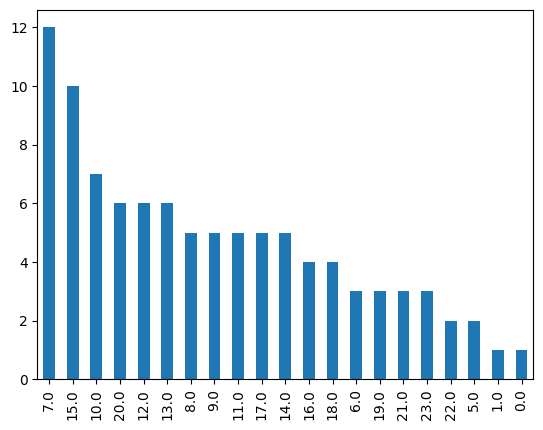

In [177]:
short_tovima_df['hour'].value_counts().plot(kind='bar')

**ΣΥΝΝΕΦΟΛΕΞΟ**

In [178]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [179]:
short2_tovima_df = tovima_full_articles_df[['full_text', 'date']]

In [ ]:
short2_tovima_df

In [ ]:
short2_tovima_df['year'] = pd.DatetimeIndex(short2_tovima_df['date']).year
short2_tovima_df['day'] = pd.DatetimeIndex(short2_tovima_df['date']).month
short2_tovima_df['month'] = pd.DatetimeIndex(short2_tovima_df['date']).day
short2_tovima_df['hour'] = pd.DatetimeIndex(short2_tovima_df['date']).hour

In [182]:
short2_tovima_df

,full_text,date,year,day,month,hour
0,Για τέταρτη ημέρα συνεχίζονται σήμερα οι Πανελ...,09.06.2023 07:33,2023.0,9.0,6.0,7.0
1,Ανοίγει ξανά σήμερα Παρασκευή 9 Ιουνίου στις 1...,09.06.2023 07:29,2023.0,9.0,6.0,7.0
2,Η διπλωματία της Κούβας χαρακτήρισε χθες Πέμπτ...,09.06.2023 07:22,2023.0,9.0,6.0,7.0
3,"«Ψήνεται», μαθαίνω, συνάντηση στο ΝΑΤΟ ανάμεσα...",09.06.2023 07:16,2023.0,9.0,6.0,7.0
4,Φωτιά ξέσπασε τα ξημερώματα σε διαμέρισμα που ...,09.06.2023 06:49,2023.0,9.0,6.0,6.0
...,...,...,...,...,...,...
95,Ερευνητές του Πανεπιστημίου του Κέιμπριτζ εκπα...,08.06.2023 06:50,2023.0,8.0,6.0,6.0
96,Μόλις μία μονάδα περαιτέρω μείωση των ασφαλιστ...,08.06.2023 06:40,2023.0,8.0,6.0,6.0
97,Ποια είναι τα νέα κόμματα που ζητούν την ψήφο...,08.06.2023 05:00,2023.0,8.0,6.0,5.0
98,Ενας 44χρονος πρώην οδηγός ταξί που είχε κατηγ...,08.06.2023 01:40,2023.0,8.0,6.0,1.0


In [183]:
short2_tovima_df['full_text']

0     Για τέταρτη ημέρα συνεχίζονται σήμερα οι Πανελ...
1     Ανοίγει ξανά σήμερα Παρασκευή 9 Ιουνίου στις 1...
2     Η διπλωματία της Κούβας χαρακτήρισε χθες Πέμπτ...
3     «Ψήνεται», μαθαίνω, συνάντηση στο ΝΑΤΟ ανάμεσα...
4     Φωτιά ξέσπασε τα ξημερώματα σε διαμέρισμα που ...
                            ...                        
95    Ερευνητές του Πανεπιστημίου του Κέιμπριτζ εκπα...
96    Μόλις μία μονάδα περαιτέρω μείωση των ασφαλιστ...
97     Ποια είναι τα νέα κόμματα που ζητούν την ψήφο...
98    Ενας 44χρονος πρώην οδηγός ταξί που είχε κατηγ...
99    Δολοφονική επίθεση σημειώθηκε αργά το βράδυ τη...
Name: full_text, Length: 100, dtype: object

In [ ]:
short2_tovima_df[short2_tovima_df['day']==8.0]['full_text']

In [185]:
text = short2_tovima_df[short2_tovima_df['day']==8.0]['full_text'].str.cat(sep = ' ')

In [ ]:
text

In [187]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

In [189]:
doc = nlp(short2_tovima_df['full_text'][0])

In [206]:
doc = nlp(short2_tovima_df['full_text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

In [ ]:
' '.join(token.lemma_ for token in doc)

In [ ]:
text

In [210]:
nlp.max_length = 2212356

In [211]:
full_doc = nlp(text)

In [212]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [213]:
clear_text[200:400]

'νός μέτωπο με ο ισχυρής μοναρχία ο Κόλπου παρά ο πολύς διαφορά . ο Αμερικανός αξιωματούχος κάνω ο δήλωση σε ο τέλος ένας τριήμερος επίσκεψη σε ο Σαουδική Αραβία , σημαντικός εταίρο ο ΗΠΑ , με ο οποίος'

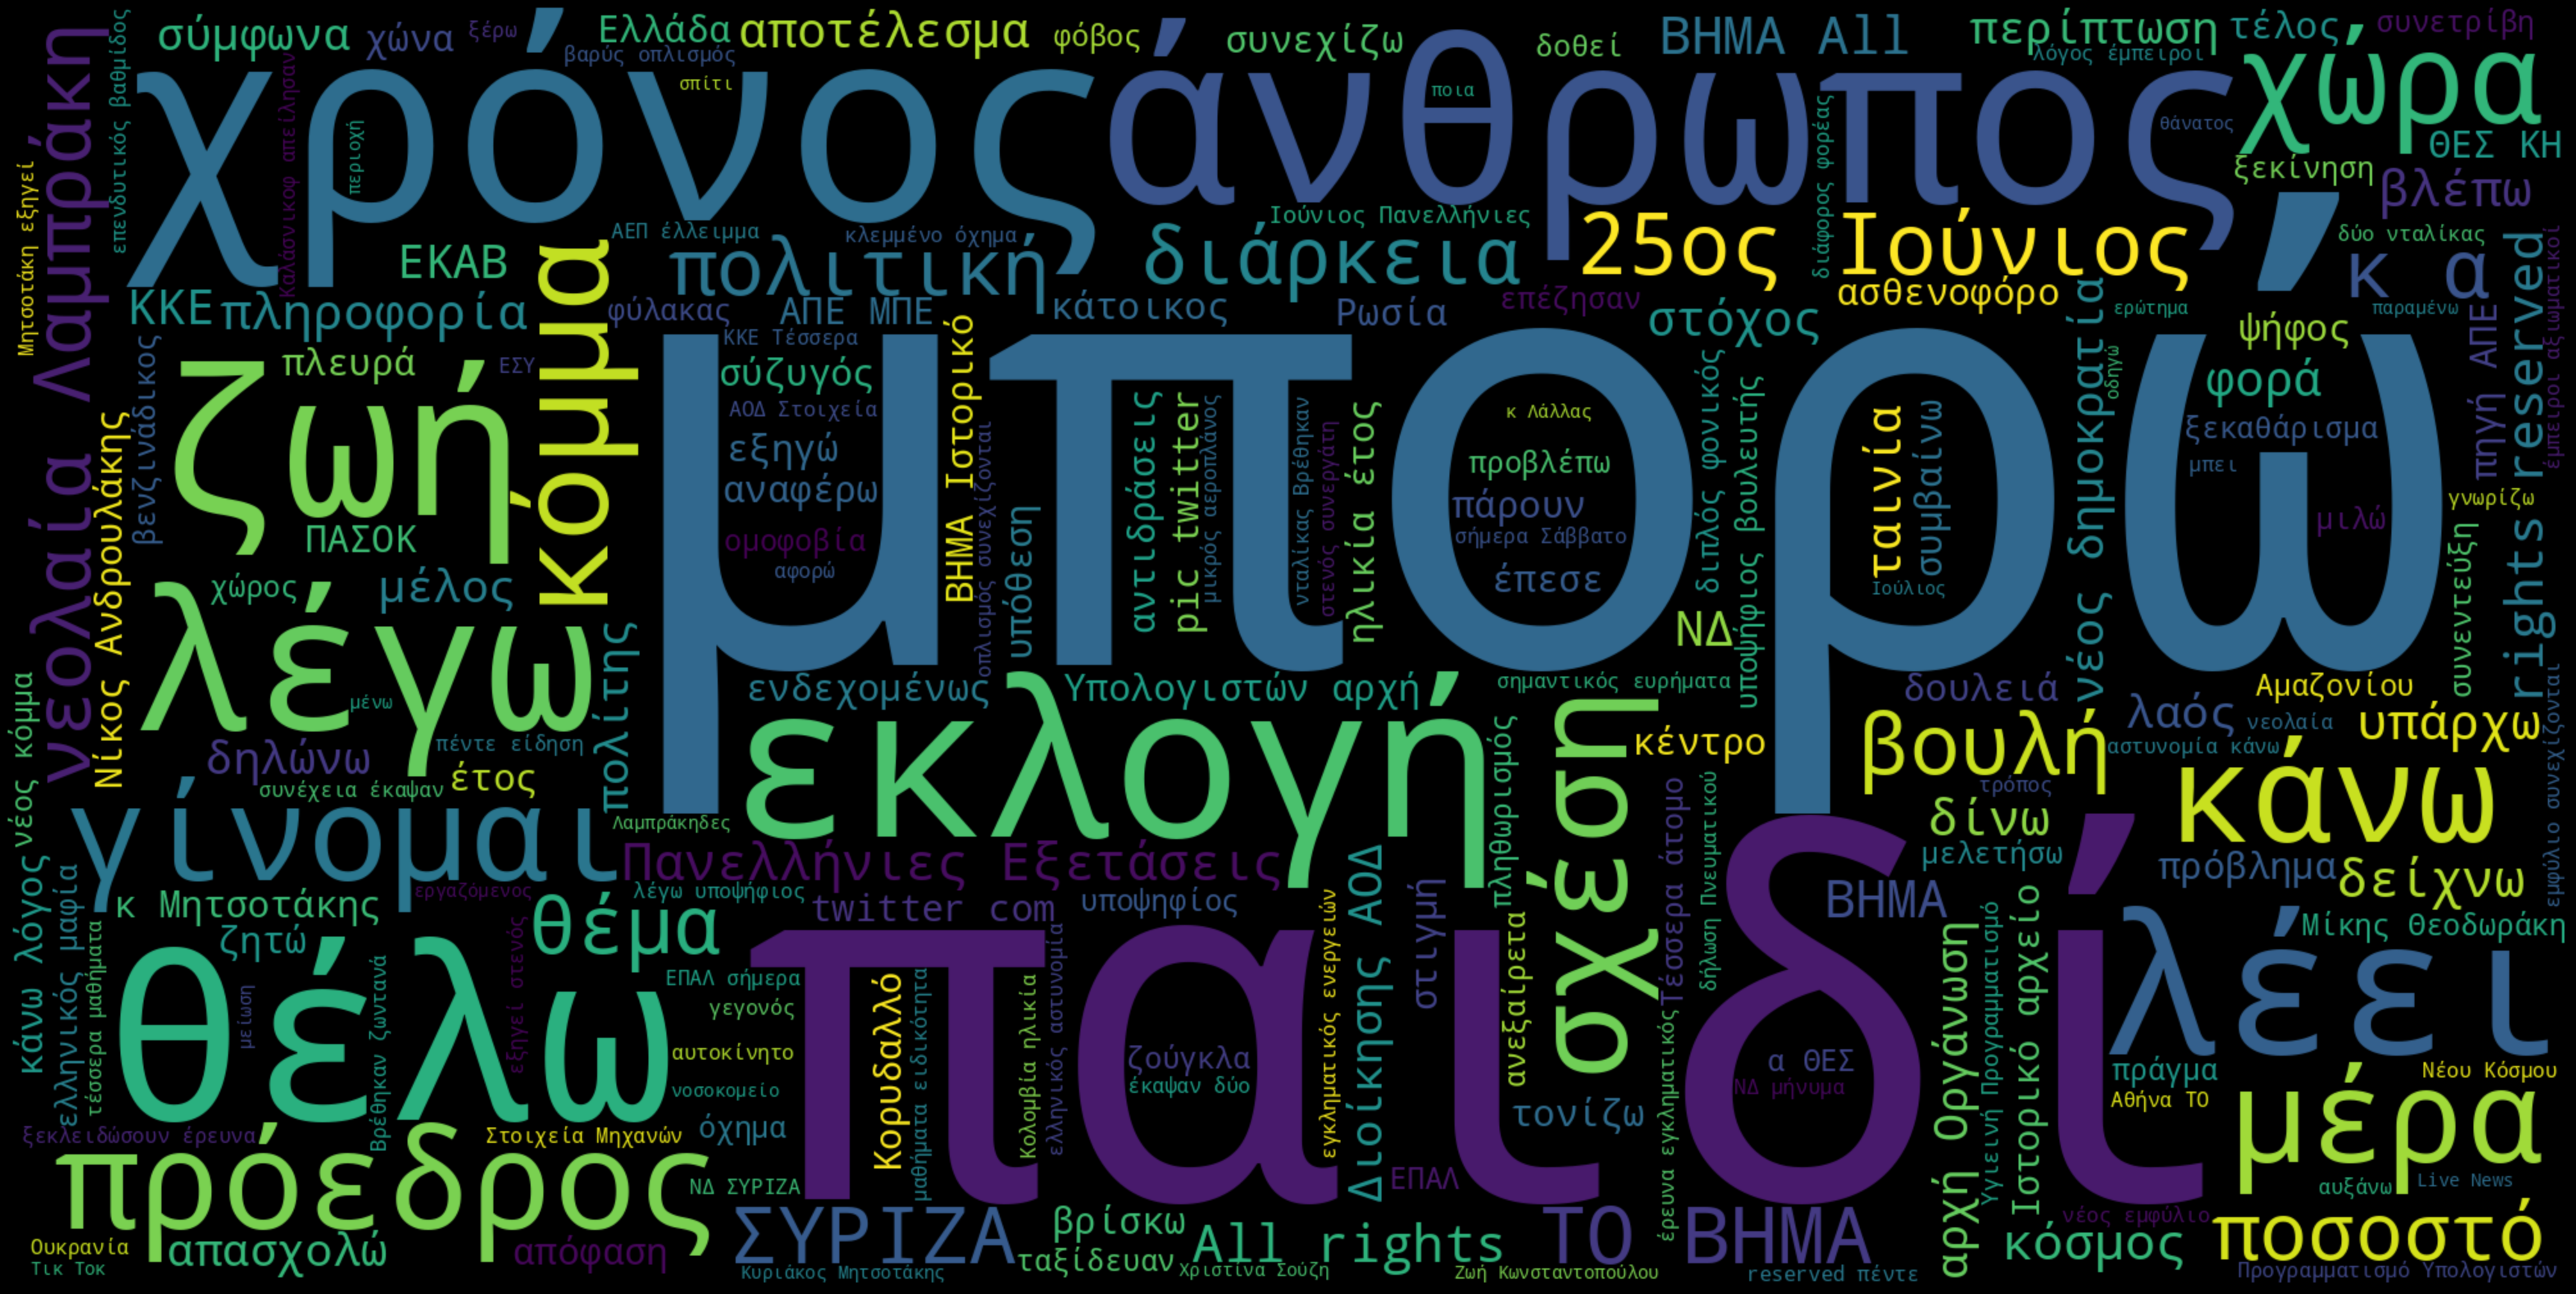

In [226]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Στην συγκεκριμένη έρευνα, μαζέψαμε 'ολα τα άρθρα της 08/06 από την ιστοσελίδα tovima.gr, προκειμένου να εξάγουμε συμπεράσματα για την ειδησεογραφία της ημέρας. Δεδομένου ότι τα περισσότερα άρθρα αναρτoύνται στις 7 το πρωί, όπως παρατηρούμε και στο παραπάνω γράφημα, μπορούμε να πούμε ότι στην πλειόνοτήτα τους άπτονται κοινωνικά θέματα. Επίκεντρο φαίνεται πως είναι ο άνθρωπος, το παιδί, η ζωή και ο χρόνος, όπως φαίνεται και στο παραπάνω "συννεφόλεξο". Επίσης, παρατηρούμε ότι δεν είναι σύνηθες μέσα στα άρθρα αυτής της ημέρας να αναφέρονται λέξεις και έννοιες γύρω από το θέμα των εκλογών και την πολιτική διαμάχη.